In [1]:
%pylab inline
import pandas

d = pandas.read_csv("data/movie_reviews.tsv", delimiter="\t")

# Holdout split
split = 0.7
d_train = d[:int(split*len(d))]
d_test = d[int((1-split)*len(d)):]

Populating the interactive namespace from numpy and matplotlib


In [2]:
## tf-idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=1, max_features=None, norm="l2")
features_w2v = vectorizer.fit_transform(d_train.review)
test_features_w2v = vectorizer.transform(d_test.review)

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_score, recall_score
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    precision = precision_score(y_true, pred[:,1] > 0.5, average='binary')
    recall = recall_score(y_true, pred[:,1] > 0.5, average='binary')
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth="3")
    
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("Acc: %0.2f" % acc, (0.1,0.8), size=14)
        annotate("Precision: %0.2f" % precision, (0.1,0.7), size=14)
        annotate("Recall: %0.2f" % recall, (0.1,0.6), size=14)
        annotate("AUC: %0.2f" % auc, (0.1,0.5), size=14)



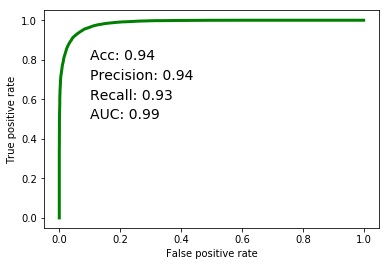

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_rf.fit(features_w2v, d_train.sentiment)
pred_rf = model_rf.predict_proba(test_features_w2v)
performance(d_test.sentiment, pred_rf)

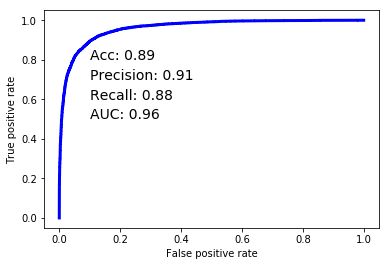

In [29]:
# Navie Bayes

from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(features_w2v, d_train.sentiment)

pred_NB = model_NB.predict_proba(test_features_w2v)
performance(d_test.sentiment, pred_NB, color="b")

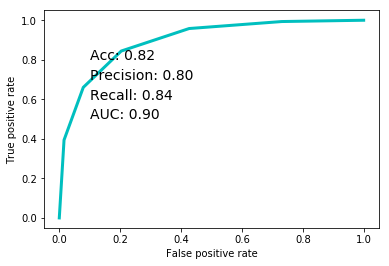

In [30]:
 # K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(features_w2v, d_train.sentiment)

pred_KNN = model_KNN.predict_proba(test_features_w2v)
performance(d_test.sentiment, pred_KNN, color="c")

17500


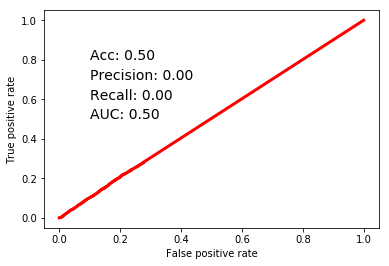

In [31]:
# Neural network models
from sklearn.neural_network import MLPClassifier
model_NNM = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model_NNM.fit(features_w2v, d_train.sentiment)

pred_NNM = model_NNM.predict_proba(test_features_w2v)
performance(d_test.sentiment, pred_NNM, color="r")
print len(d_test.sentiment)

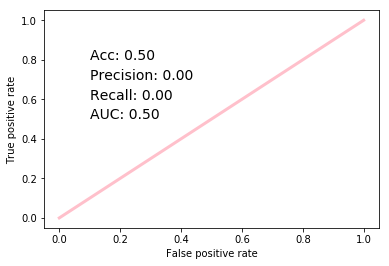

In [23]:
# Support Vector Classification
from sklearn.svm import SVC
model_SVC = SVC(probability=True)
model_SVC.fit(features_w2v, d_train.sentiment)

pred_SVC = model_SVC.predict_proba(test_features_w2v)
performance(d_test.sentiment, pred_SVC, color="pink")


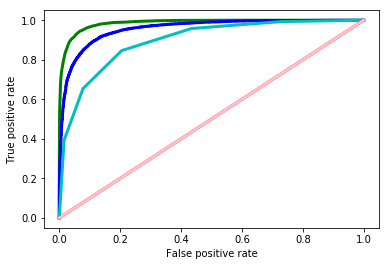

In [25]:
performance(d_test.sentiment, pred_rf,ann = False)
performance(d_test.sentiment, pred_NB, color="b",ann = False)
performance(d_test.sentiment, pred_KNN, color="c",ann = False)
performance(d_test.sentiment, pred_NNM, color="r",ann = False)
performance(d_test.sentiment, pred_SVC, color="pink",ann = False)